#### Import modules and libraries

In [1]:
from pyxpcm.models import pcm
import numpy as np
import pyxpcm
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import netCDF4 as nc
import xarray as xr
import seaborn as sns
import cmocean
import cartopy.feature as cfeature 
import argopy
import pandas as pd

#### Data Prepration

In [2]:
#Selecting the dataset
ds =xr.open_dataset("/home/cccr/shikha/MAYUR/Project/Data/30_120_30S_30N_0_1000_2014-01-01_2014-12-31_erddap.nc")
ds

<xarray.Dataset>
Dimensions:                (N_LEVELS: 627, N_PROF: 16188)
Coordinates:
  * N_PROF                 (N_PROF) int64 15406 12050 10377 ... 10723 7396 7506
  * N_LEVELS               (N_LEVELS) int64 0 1 2 3 4 5 ... 622 623 624 625 626
    LATITUDE               (N_PROF) float64 ...
    LONGITUDE              (N_PROF) float64 ...
    TIME                   (N_PROF) datetime64[ns] ...
Data variables: (12/13)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 ...
    CYCLE_NUMBER           (N_PROF) int64 ...
    DATA_MODE              (N_PROF) object ...
    DIRECTION              (N_PROF) object ...
    PLATFORM_NUMBER        (N_PROF) int64 ...
    POSITION_QC            (N_PROF) int64 ...
    ...                     ...
    PRES_QC                (N_PROF) int64 ...
    PSAL                   (N_PROF, N_LEVELS) float32 ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 ...
    TEMP_QC                (N_PROF) int64 ...
    TIME_QC                (N_PROF) int64 ...
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/03/22
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [3]:
ds['PRES'][0].values

array([ 500.  ,  502.  ,  503.96,  505.96,  508.  ,  510.04,  512.  ,
        514.  ,  516.  ,  518.  ,  520.  ,  522.  ,  524.04,  525.96,
        527.96,  530.04,  532.04,  534.  ,  535.96,  538.  ,  540.04,
        542.  ,  544.04,  546.  ,  548.  ,  549.96,  551.96,  554.  ,
        556.  ,  558.  ,  559.96,  561.96,  563.96,  565.96,  567.96,
        570.  ,  572.04,  574.  ,  576.  ,  577.96,  579.96,  581.96,
        584.  ,  586.04,  588.04,  590.04,  592.  ,  594.  ,  596.04,
        598.  ,  600.  ,  602.04,  604.  ,  606.  ,  607.96,  610.  ,
        612.  ,  614.  ,  615.96,  618.  ,  620.  ,  622.  ,  624.04,
        626.  ,  628.  ,  630.  ,  632.  ,  633.96,  635.96,  637.96,
        639.96,  641.96,  643.96,  645.96,  648.  ,  650.04,  652.04,
        654.  ,  656.  ,  658.  ,  660.  ,  662.04,  664.04,  666.04,
        668.04,  670.  ,  671.96,  674.  ,  676.04,  678.04,  680.04,
        682.  ,  683.96,  685.96,  688.  ,  690.04,  692.  ,  694.  ,
        695.96,  698

In [29]:
df_press=pd.DataFrame(ds['PRES'].values)
data=np.array(df_press.values)

In [7]:
a = np.array([[0, 5], [3, 2]])  
a=data
indices = np.argsort(a, axis=1)  
data1=np.take_along_axis(ds['TEMP'].values, indices, axis=1) 
data2=np.take_along_axis(ds['PSAL'].values, indices, axis=1)  
data3=np.take_along_axis(ds['PRES'].values, indices, axis=1)  


In [8]:
ds['TEMP'].values=data1.copy()
ds['PSAL'].values=data2.copy()
ds['PRES'].values=data3.copy()

In [9]:
ds['N_LEVELS']=ds['N_LEVELS']*-1

In [10]:
ds['PRES'][0].values

array([   1.12,    2.  ,    3.  ,    4.  ,    4.96,    5.96,    6.96,
          8.  ,    9.04,   10.  ,   11.  ,   12.04,   13.04,   14.  ,
         15.  ,   16.  ,   17.  ,   17.96,   19.  ,   20.  ,   21.  ,
         22.  ,   23.  ,   24.  ,   25.  ,   26.04,   27.  ,   28.  ,
         29.04,   29.96,   30.96,   32.04,   33.  ,   34.  ,   35.04,
         36.04,   36.96,   38.  ,   39.  ,   39.96,   41.  ,   42.  ,
         43.  ,   44.  ,   45.  ,   45.96,   47.  ,   48.04,   49.04,
         50.04,   51.04,   52.04,   53.  ,   54.  ,   55.  ,   55.96,
         57.  ,   58.  ,   58.96,   60.  ,   61.04,   61.96,   63.  ,
         64.04,   65.  ,   65.96,   67.  ,   68.  ,   69.04,   70.  ,
         71.  ,   72.04,   73.04,   74.04,   75.  ,   75.96,   77.  ,
         78.  ,   79.  ,   80.  ,   81.  ,   82.  ,   83.  ,   84.  ,
         85.  ,   86.  ,   87.  ,   88.  ,   89.  ,   90.  ,   91.  ,
         92.04,   93.  ,   93.96,   94.96,   95.96,   97.  ,   98.  ,
         99.  ,  100

Text(0.5, 1.0, 'Temperature Recorded by Argos from 01/2011-03/2011')

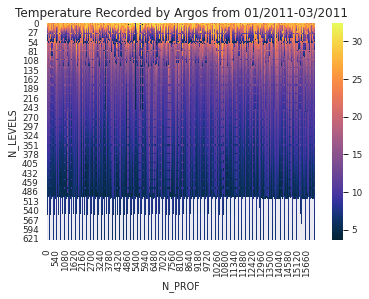

In [31]:
sns.heatmap(ds.transpose()['TEMP'][:,:],cmap=cmocean.cm.thermal)
plt.ylabel('N_LEVELS')
plt.xlabel('N_PROF')


plt.title('Temperature Recorded by Argos from 01/2011-03/2011', fontsize=12)

# plt.savefig("Temperature Recorded by Argos.jpg",dpi=600)

#### Fitting a Model with Mmanipulated data 



In [11]:
z = np.arange(0,-200,-1.0)
pcm_features = {'temperature': z, 'salinity':z}
# z

In [12]:
m = pcm(K=8, features=pcm_features)
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: False
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>

In [13]:
features_in_ds = {'temperature': 'TEMP', 'salinity': 'PSAL'}
features_zdim='N_LEVELS'

In [14]:
ds['TEMP'].attrs['feature_name'] = 'temperature'
ds['PSAL'].attrs['feature_name'] = 'salinity'
ds['N_LEVELS'].attrs['axis'] = 'Z'

In [15]:
m.fit(ds, features=features_in_ds, dim=features_zdim)
m

<pcm 'gmm' (K: 8, F: 2)>
Number of class: 8
Number of feature: 2
Feature names: odict_keys(['temperature', 'salinity'])
Fitted: True
Feature: 'temperature'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Feature: 'salinity'
	 Interpoler: <class 'pyxpcm.utils.Vertical_Interpolator'>
	 Scaler: 'normal', <class 'sklearn.preprocessing._data.StandardScaler'>
	 Reducer: True, <class 'sklearn.decomposition._pca.PCA'>
Classifier: 'gmm', <class 'sklearn.mixture._gaussian_mixture.GaussianMixture'>
	 log likelihood of the training set: 18.537915

In [28]:
m.predict(ds, features=features_in_ds,inplace=True)
# ds

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/pyxpcm/xarray.py:89: UserWarning: PCM_LABELS variable already in the dataset: overwriting
  warnings.warn(("%s variable already in the dataset: overwriting") % (da.name))


<xarray.Dataset>
Dimensions:                (N_LEVELS: 627, N_PROF: 16188, pcm_class: 8, quantile: 3)
Coordinates:
  * pcm_class              (pcm_class) int64 0 1 2 3 4 5 6 7
  * N_PROF                 (N_PROF) int64 15406 12050 10377 ... 10723 7396 7506
  * N_LEVELS               (N_LEVELS) int64 0 -1 -2 -3 ... -623 -624 -625 -626
    LATITUDE               (N_PROF) float64 11.53 -25.54 7.627 ... 4.988 5.113
    LONGITUDE              (N_PROF) float64 86.2 111.1 86.38 ... 69.07 59.22
    TIME                   (N_PROF) datetime64[ns] 2014-01-01T00:25:33 ... 20...
  * quantile               (quantile) float64 0.05 0.5 0.95
Data variables: (12/17)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 3 1 1 1 1 1 1 1 1 ... 1 1 1 4 1 1 1 1
    CYCLE_NUMBER           (N_PROF) int64 13 244 79 95 205 ... 85 14 35 126 126
    DATA_MODE              (N_PROF) object 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int64 5904313 5901622 ... 2901591 2901594
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    TEMP_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PCM_LABELS             (N_PROF) float64 4.0 nan nan 5.0 ... nan nan nan nan
    PCM_POST               (pcm_class, N_PROF) float64 0.0 nan nan ... nan nan
    TEMP_Q                 (pcm_class, quantile, N_LEVELS) float64 19.72 ... nan
    PSAL_Q                 (pcm_class, quantile, N_LEVELS) float64 35.11 ... nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/03/22
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [17]:
m.predict_proba(ds, features=features_in_ds, inplace=True)

<xarray.Dataset>
Dimensions:                (N_LEVELS: 627, N_PROF: 16188, pcm_class: 8)
Coordinates:
  * N_PROF                 (N_PROF) int64 15406 12050 10377 ... 10723 7396 7506
  * N_LEVELS               (N_LEVELS) int64 0 -1 -2 -3 ... -623 -624 -625 -626
    LATITUDE               (N_PROF) float64 11.53 -25.54 7.627 ... 4.988 5.113
    LONGITUDE              (N_PROF) float64 86.2 111.1 86.38 ... 69.07 59.22
    TIME                   (N_PROF) datetime64[ns] 2014-01-01T00:25:33 ... 20...
Dimensions without coordinates: pcm_class
Data variables: (12/15)
    CONFIG_MISSION_NUMBER  (N_PROF) int64 3 1 1 1 1 1 1 1 1 ... 1 1 1 4 1 1 1 1
    CYCLE_NUMBER           (N_PROF) int64 13 244 79 95 205 ... 85 14 35 126 126
    DATA_MODE              (N_PROF) object 'D' 'D' 'D' 'D' ... 'D' 'D' 'D' 'D'
    DIRECTION              (N_PROF) object 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A'
    PLATFORM_NUMBER        (N_PROF) int64 5904313 5901622 ... 2901591 2901594
    POSITION_QC            (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    ...                     ...
    PSAL_QC                (N_PROF, N_LEVELS) int64 ...
    TEMP                   (N_PROF, N_LEVELS) float32 27.19 27.19 ... nan nan
    TEMP_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    TIME_QC                (N_PROF) int64 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    PCM_LABELS             (N_PROF) float64 4.0 nan nan 5.0 ... nan nan nan nan
    PCM_POST               (pcm_class, N_PROF) float64 0.0 nan nan ... nan nan
Attributes:
    DATA_ID:              ARGO
    DOI:                  http://doi.org/10.17882/42182
    Fetched_from:         https://www.ifremer.fr/erddap
    Fetched_by:           shikha
    Fetched_date:         2021/03/22
    Fetched_constraints:  [x=30.00/120.00; y=-30.00/30.00; z=0.0/1000.0; t=20...
    Fetched_uri:          ['https://www.ifremer.fr/erddap/tabledap/ArgoFloats...
    history:              Variables filtered according to DATA_MODE; Variable...

In [18]:
for vname in ['TEMP', 'PSAL']:
    ds= ds.pyxpcm.quantile(m, q=[0.05, 0.5, 0.95], of=vname, outname=vname + '_Q', keep_attrs=True, inplace=True)
# ds

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,


### Plotting

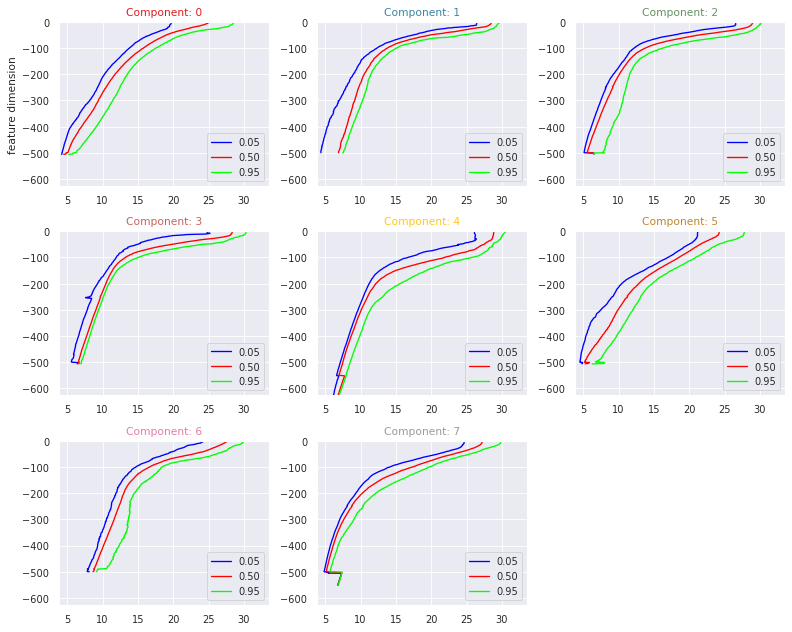

In [19]:
fig, ax = m.plot.quantile(ds['TEMP_Q'])
# plt.savefig("quantile2.jpg")

/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/pyxpcm/plot.py:111: MatplotlibDeprecationWarning: The 'cmap' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  colorbar = plt.colorbar(mappable, **kwargs)
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/cccr/shikha/anaconda3/envs/menv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


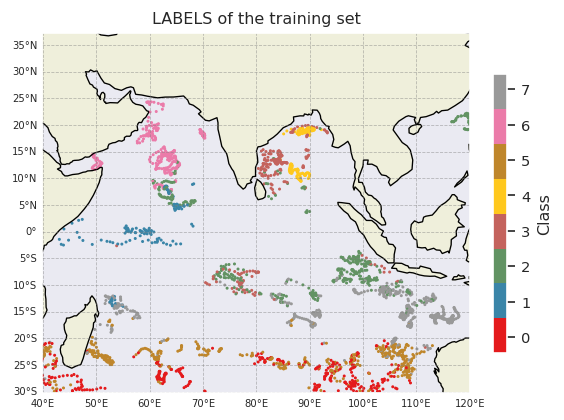

In [20]:
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([40,120,-24,30]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5), dpi=120, facecolor='w', edgecolor='k', subplot_kw=subplot_kw)

kmap = m.plot.cmap()
sc = ax.scatter(ds['LONGITUDE'], ds['LATITUDE'], s=1, c=ds['PCM_LABELS'], cmap=kmap, transform=proj, vmin=0, vmax=m.K)
cl = m.plot.colorbar(ax=ax)

gl = m.plot.latlongrid(ax, dx=10)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.COASTLINE)
ax.set_title('LABELS of the training set')
plt.show()
# plt.savefig("clusters021.jpg",dpi=400)

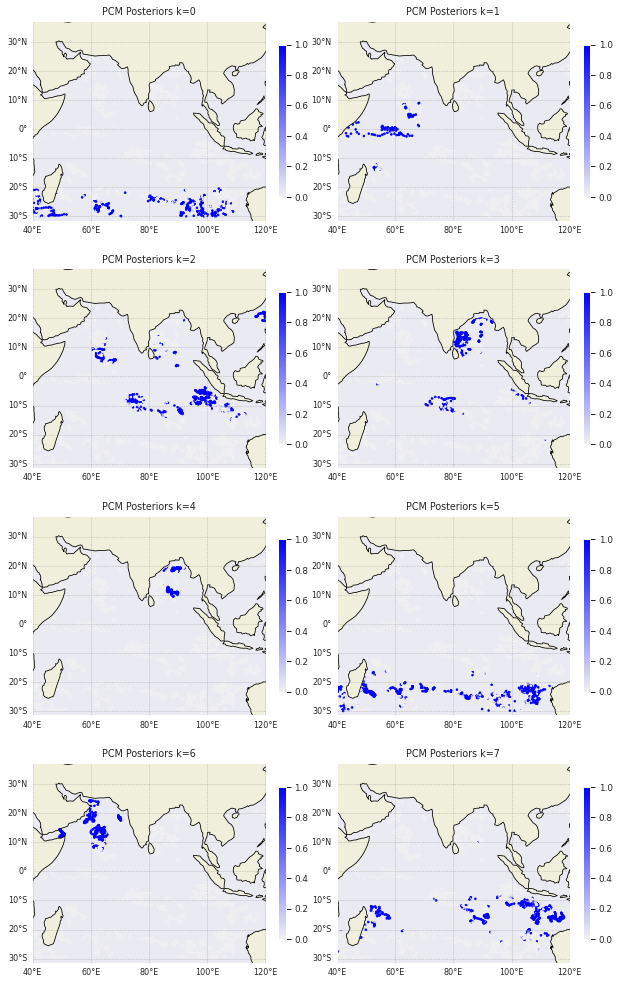

In [21]:
cmap = sns.light_palette("blue", as_cmap=True)
proj = ccrs.PlateCarree()
subplot_kw={'projection': proj, 'extent': np.array([40,120,-25,30]) + np.array([-0.1,+0.1,-0.1,+0.1])}
fig, ax = m.plot.subplots(figsize=(10,22), maxcols=2, subplot_kw=subplot_kw)

for k in m:
    sc = ax[k].scatter(ds['LONGITUDE'], ds['LATITUDE'], s=3, c=ds['PCM_POST'].sel(pcm_class=k),
                       cmap=cmap, transform=proj, vmin=0, vmax=1)
    cl = plt.colorbar(sc, ax=ax[k], fraction=0.03)
    gl = m.plot.latlongrid(ax[k], fontsize=8, dx=20, dy=10)
    ax[k].add_feature(cfeature.LAND)
    ax[k].add_feature(cfeature.COASTLINE)
    ax[k].set_title('PCM Posteriors k=%i' % k)
#     plt.savefig("Posteriors02.jpg")

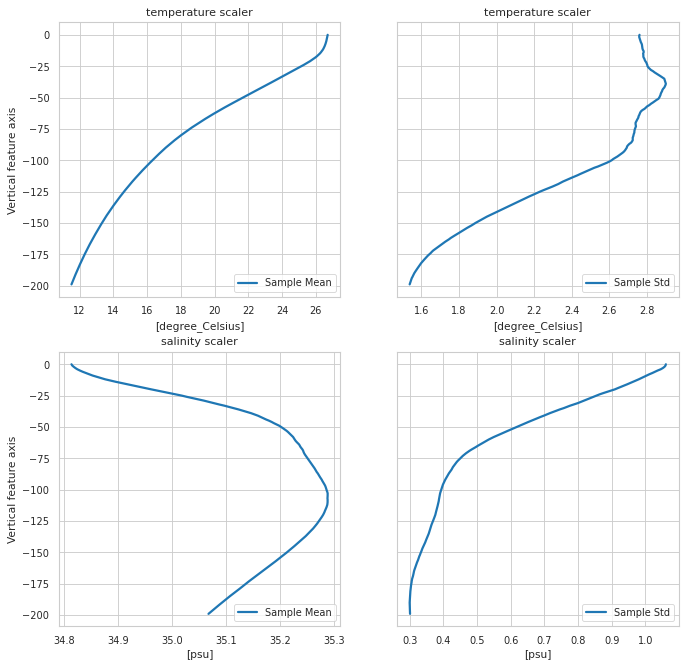

In [32]:
fig, ax = m.plot.scaler()
# plt.savefig("sacler02.jpg")

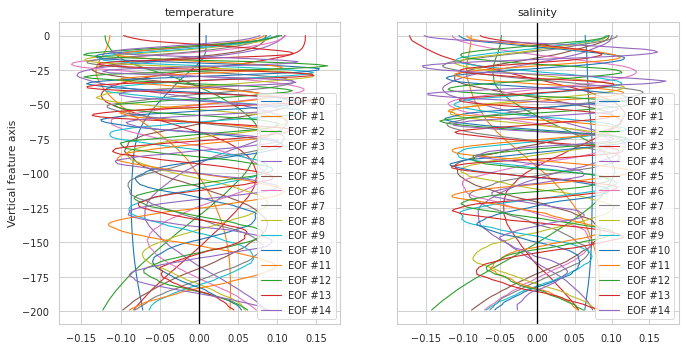

In [25]:
fig, ax = m.plot.reducer()